In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cat = pd.read_csv('logs/LOGS_CAT.csv')
df_rf = pd.read_csv('logs/LOGS_RF.csv')
df_xgb = pd.read_csv('logs/LOGS_XGB.csv')

In [10]:
df_cat.sort_values(by=['cv_mean', 'cv_std', 'test_score'], ascending=[False, True, False], inplace=True)
df_rf.sort_values(by=['cv_mean', 'cv_std', 'es'], ascending=[False, True, False], inplace=True)
df_xgb.sort_values(by=['cv_mean', 'cv_std', 'test_score'], ascending=[False, True, False], inplace=True)

In [15]:
df_cat.head()

,model,iterations,depth,learning_rate,subsample,colsample_bylevel,min_data_in_leaf,test_score,cv_1,cv_2,cv_3,cv_4,cv_mean,cv_std,columns
187,<__main__.CatBoostClassifierWithThreshold obje...,1000,5,0.007977,0.613690,0.790170,9,1310.0,1400.0,1330.0,1400.0,1410.0,1385.0,32.015621,"['x100', 'x101', 'x102', 'x105']"
33,<__main__.CatBoostClassifierWithThreshold obje...,1000,7,0.013128,0.752751,0.286169,1,1310.0,1370.0,1310.0,1390.0,1470.0,1385.0,57.227616,"['x100', 'x101', 'x105']"
185,<__main__.CatBoostClassifierWithThreshold obje...,1000,5,0.005982,0.581074,0.944102,7,1300.0,1390.0,1320.0,1390.0,1430.0,1382.5,39.607449,"['x100', 'x101', 'x102', 'x105']"
105,<__main__.CatBoostClassifierWithThreshold obje...,1000,7,0.002508,0.538523,0.612794,1,1280.0,1370.0,1320.0,1380.0,1460.0,1382.5,50.187150,"['x100', 'x101', 'x102', 'x105']"
52,<__main__.CatBoostClassifierWithThreshold obje...,1000,5,0.013515,0.326241,0.423550,1,1320.0,1370.0,1300.0,1390.0,1470.0,1382.5,60.570207,"['x100', 'x101', 'x105']"


In [16]:
df_rf.head()

,model,n_estimators,max_depth,min_samples_split,min_samples_leaf,es,cv1,cv2,cv3,cv4,cv_mean,cv_std,columns
17,RandomForestClassifierWithThreshold(max_depth=...,1000,8,11,12,1290.0,1390.0,1310.0,1350.0,1440.0,1372.5,48.153401,"['x100', 'x101', 'x105']"
53,RandomForestClassifierWithThreshold(max_depth=...,1000,8,13,12,1290.0,1390.0,1310.0,1350.0,1440.0,1372.5,48.153401,"['x100', 'x101', 'x105']"
56,RandomForestClassifierWithThreshold(max_depth=...,1000,8,12,12,1290.0,1390.0,1310.0,1350.0,1440.0,1372.5,48.153401,"['x100', 'x101', 'x105']"
57,RandomForestClassifierWithThreshold(max_depth=...,1000,8,11,12,1290.0,1390.0,1310.0,1350.0,1440.0,1372.5,48.153401,"['x100', 'x101', 'x105']"
58,RandomForestClassifierWithThreshold(max_depth=...,1000,8,11,12,1290.0,1390.0,1310.0,1350.0,1440.0,1372.5,48.153401,"['x100', 'x101', 'x105']"


In [17]:
df_xgb.head()

,model,n_estimators,max_depth,learning_rate,subsample,colsample_bytree,min_child_weight,test_score,cv_1,cv_2,cv_3,cv_4,cv_mean,cv_std,columns
93,"XGBClassifierWithThreshold(base_score=None, bo...",1000,3,0.008778,0.767508,0.862300,2,1280.0,1370.0,1320.0,1400.0,1460.0,1387.5,50.682837,"['x100', 'x101', 'x105']"
96,"XGBClassifierWithThreshold(base_score=None, bo...",1000,3,0.009072,0.759775,0.769164,9,1330.0,1360.0,1320.0,1370.0,1480.0,1382.5,59.319053,"['x100', 'x101', 'x105']"
41,"XGBClassifierWithThreshold(base_score=None, bo...",1000,3,0.010482,0.928278,0.902265,2,1270.0,1400.0,1280.0,1370.0,1470.0,1380.0,68.190908,"['x100', 'x101', 'x105']"
33,"XGBClassifierWithThreshold(base_score=None, bo...",1000,3,0.010510,0.597006,0.904155,4,1280.0,1370.0,1330.0,1380.0,1430.0,1377.5,35.619517,"['x100', 'x101', 'x105']"
86,"XGBClassifierWithThreshold(base_score=None, bo...",1000,3,0.011870,0.715607,0.857301,2,1260.0,1370.0,1320.0,1390.0,1430.0,1377.5,39.607449,"['x100', 'x101', 'x105']"


**NOTE**: As the best model we are choosing model *Catboost* with parameters:
- iterations: 1000
- depth: 5
- learning_rate: 0.007977
- subsample: 0.613690
- colsample_bylevel: 0.790170
- min_data_in_leaf: 9

and columns: ['x100', 'x101', 'x102', 'x105']

## Plots for the report

In [62]:
with open('logs/GreedyGainSelector_VotingClassifier_top_1_0.25_0.2_5_True.json', 'rb') as f:
    data = json.load(f)


In [64]:
data['1'].keys()

dict_keys(['curr_best_score', 'next_best_score', 'best_column_set', 'columns', 'scores', 'selected_column', 'selected_column_score'])

In [65]:
df = pd.DataFrame(columns=['columns_improving'])
for k, v in data.items():
    cbs = v['curr_best_score']
    scores = v['scores']
    columns_improving = sum([1 for s in scores if s > cbs])
    df = pd.concat([df, pd.DataFrame({'columns_improving': [columns_improving]})])
df.reset_index(drop=True, inplace=True)
df.head()

,columns_improving
0,491
1,8
2,5


In [24]:
df = pd.DataFrame(columns=['selected_column', 'selected_column_score'])
for k, v in data.items():
    df = pd.concat([df, pd.DataFrame({'selected_column': [v['selected_column']], 'selected_column_score': [v['selected_column_score']]})])
df.reset_index(drop=True, inplace=True)

In [25]:
df

,selected_column,selected_column_score
0,x101,1220.0
1,x100,1296.0
2,x105,1356.0


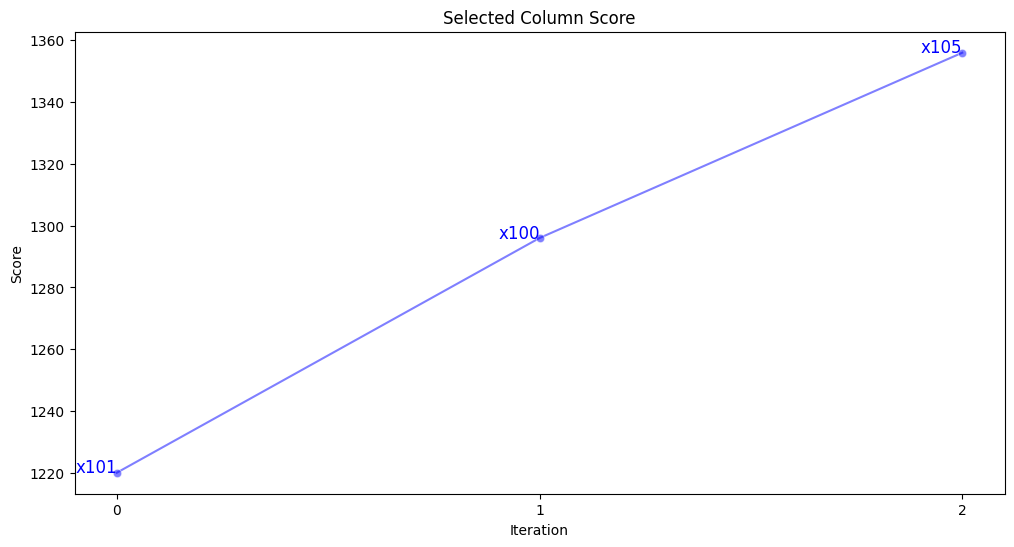

In [37]:
# Line plot of the selected column score and selected_column in circle marker
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='selected_column_score', data=df, marker='o', alpha=0.5, color='blue')
# Add text label for each point
for i in range(len(df)):
    plt.text(x=i, y=df['selected_column_score'][i], s=df['selected_column'][i], ha='right', size='large', color='blue')
plt.xticks(df.index)
plt.title('Selected Column Score')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.show()

In [26]:
import os
import json
import pandas as pd


# Load all json files from logs directory
files = [f for f in os.listdir('logs') if f.endswith('.json') and 'True' in f]
files2 = [f for f in os.listdir('logs') if f.endswith('.json') and 'False' in f]

# Open all json files and load the data
data = {}
for f in files:
    with open(f'logs/{f}', 'rb') as file:
        data[f] = json.load(file)

data2 = {}
for f in files2:
    with open(f'logs/{f}', 'rb') as file:
        data2[f] = json.load(file)

# Create list of dataframes
dfs = []
for k, v in data.items():
    df = pd.DataFrame(columns=['selected_column', 'selected_column_score'])
    for k, v in v.items():
        df = pd.concat([df, pd.DataFrame({'selected_column': [v['selected_column']], 'selected_column_score': [v['selected_column_score']]})])
    df.reset_index(drop=True, inplace=True)
    dfs.append(df)

for k, v in data2.items():
    df = pd.DataFrame(columns=['selected_column', 'selected_column_score'])
    for k, v in v.items():
        df = pd.concat([df, pd.DataFrame({'selected_column': ['-' + v['selected_column']], 'selected_column_score': [v['selected_column_score']]})])
    df.reset_index(drop=True, inplace=True)
    dfs.append(df)


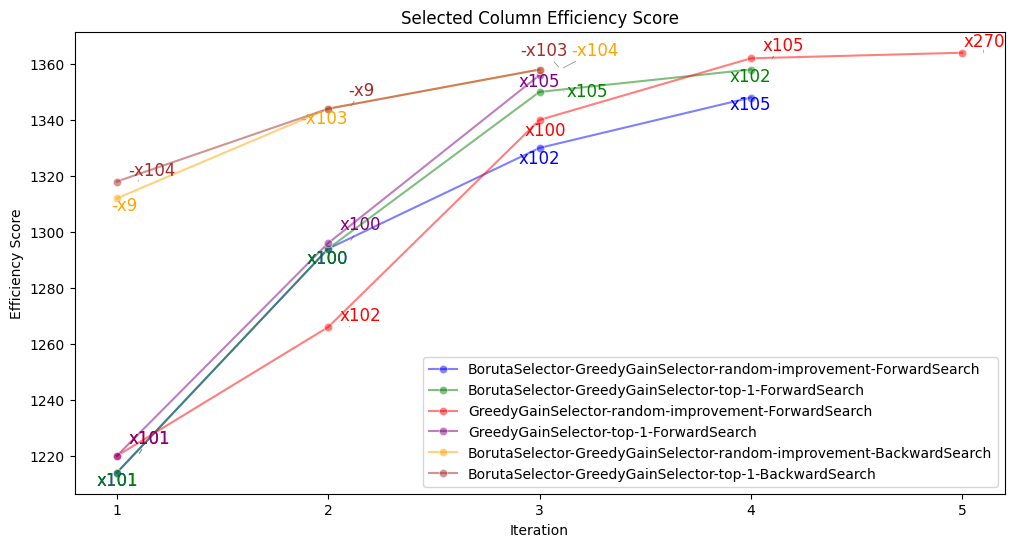

In [27]:
from adjustText import adjust_text
import seaborn as sns

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']
texts = []
files = [f.replace('.json', '').replace('_', '-').replace('True', 'ForwardSearch').replace('-VotingClassifier', '').replace('-0.25-0.2-5','') for f in files]
files2 = [f.replace('.json', '').replace('_', '-').replace('False', 'BackwardSearch').replace('-VotingClassifier', '').replace('-0.25-0.2-5','') for f in files2]
fs = files + files2
# Line plot of the selected column score and selected_column in circle marker
plt.figure(figsize=(12, 6))
for i, df in enumerate(dfs):
    sns.lineplot(x=df.index+1, y='selected_column_score', data=df, marker='o', alpha=0.5, color=colors[i], label=fs[i])
    # Add text label for each point
    for j in range(len(df)):
        texts.append(
                plt.text(x=j+1+0.1, y=df['selected_column_score'][j]+0.1, s=df['selected_column'][j], ha='right', size='large', color=colors[i])
            )
    
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))
plt.xticks([1, 2, 3, 4, 5])
plt.title('Selected Column Efficiency Score')
plt.xlabel('Iteration')
plt.ylabel('Efficiency Score')

# Save the plot
plt.savefig('plots/selected_column_score.png', dpi=300, bbox_inches='tight')
plt.show()

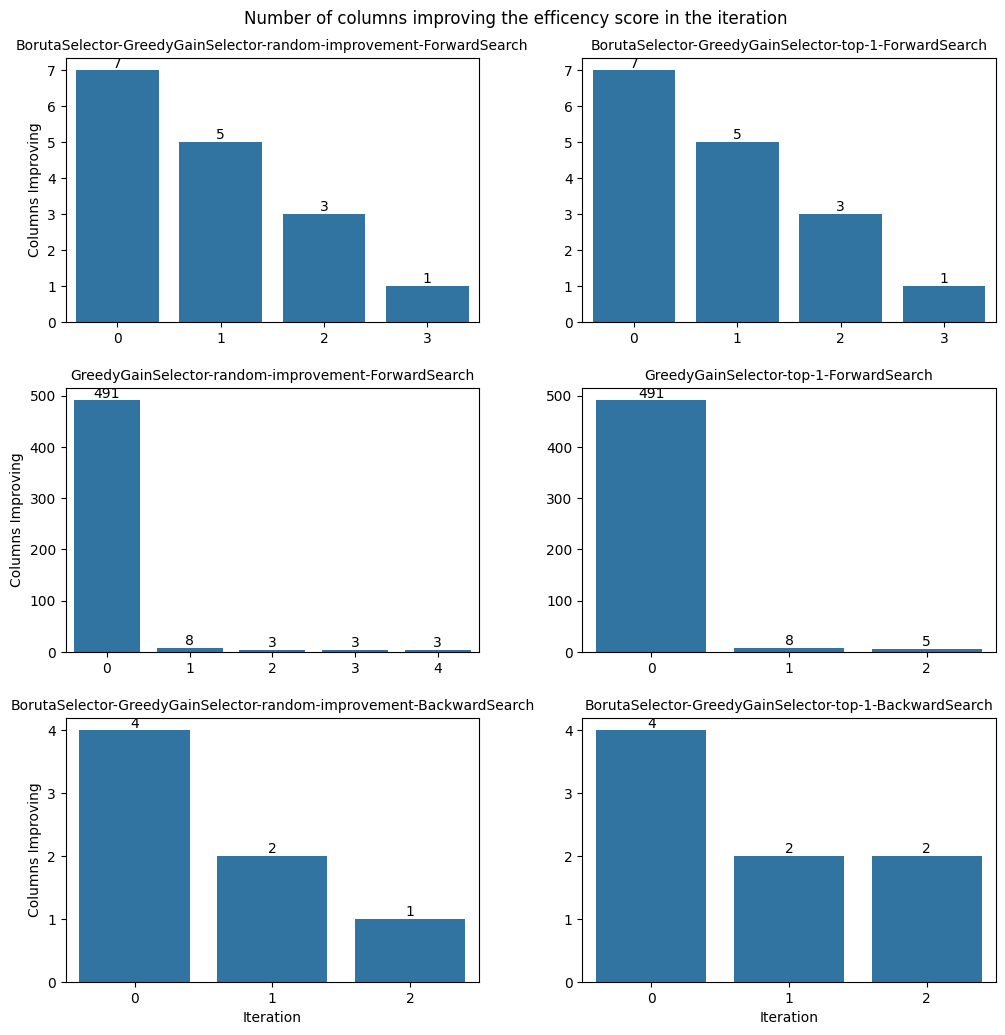

In [28]:
# subplots 2 columns 3 rows
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Number of columns improving the efficency score in the iteration', fontsize=12, y=0.92)
# bigger space between subplots
plt.subplots_adjust(hspace=0.25, wspace=0.25)

# plotting barplots for columns_improving
for i, (k, v) in enumerate(data.items()):
    df = pd.DataFrame(columns=['columns_improving'])
    for k, v in v.items():
        cbs = v['curr_best_score']
        scores = v['scores']
        columns_improving = sum([1 for s in scores if s > cbs])
        df = pd.concat([df, pd.DataFrame({'columns_improving': [columns_improving]})])
    df.reset_index(drop=True, inplace=True)
    sns.barplot(x=df.index, y='columns_improving', data=df, ax=axs[i//2, i%2])
    # Add annotation with columns improving above the bar
    for j in range(len(df)):
        axs[i//2, i%2].text(x=j, y=df['columns_improving'][j], s=df['columns_improving'][j], ha='center', va='bottom')
    axs[i//2, i%2].set_title(f'{fs[i]}', fontsize=10)
    if i%2 == 0:
        # axs[i//2, i%2].set_xlabel('Iteration')
        axs[i//2, i%2].set_ylabel('Columns Improving')
    else:
        # do not show y-axis label
        axs[i//2, i%2].set_ylabel('')
    axs[i//2, i%2].set_xlabel('')

for i, (k, v) in enumerate(data2.items()):
    df = pd.DataFrame(columns=['columns_improving'])
    for k, v in v.items():
        cbs = v['curr_best_score']
        scores = v['scores']
        columns_improving = sum([1 for s in scores if s > cbs])
        df = pd.concat([df, pd.DataFrame({'columns_improving': [columns_improving]})])
    df.reset_index(drop=True, inplace=True)
    sns.barplot(x=df.index, y='columns_improving', data=df, ax=axs[i//2 + 2, i%2])
    # Add annotation with columns improving above the bar
    for j in range(len(df)):
        axs[i//2 + 2, i%2].text(x=j, y=df['columns_improving'][j], s=df['columns_improving'][j], ha='center', va='bottom')
    axs[i//2 + 2, i%2].set_title(f'{fs[i+4]}', fontsize=10)
    if i%2 == 0:
        axs[i//2 + 2, i%2].set_ylabel('Columns Improving')
    else:
        axs[i//2 + 2, i%2].set_ylabel('')
    # if i//2 + 2 == 1:
    axs[i//2 + 2, i%2].set_xlabel('Iteration')
    # y-axis only integer
    axs[i//2 + 2, i%2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Save the plot
plt.savefig('plots/columns_improving.png', dpi=300, bbox_inches='tight')

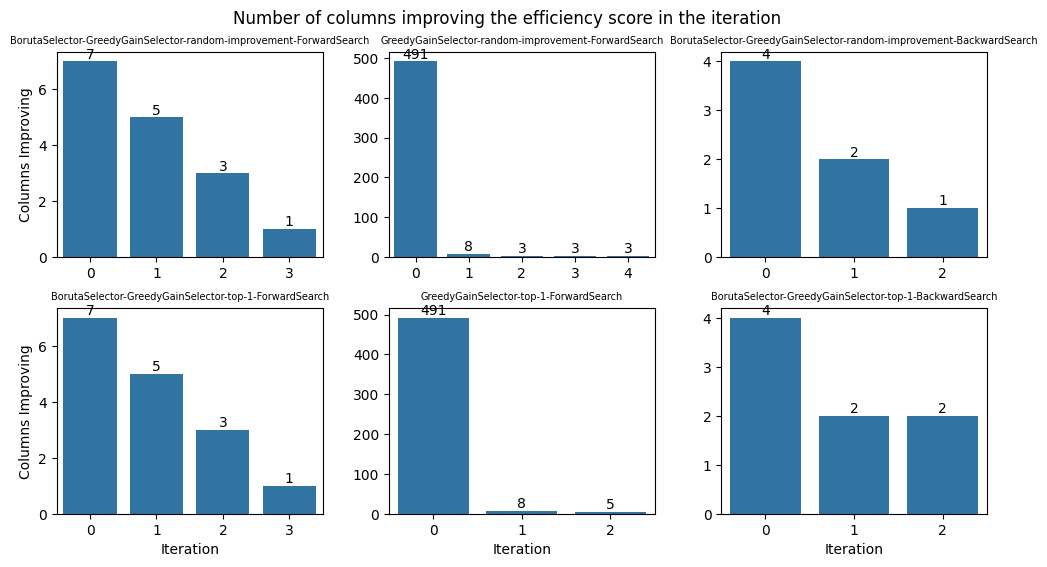

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Number of columns improving the efficiency score in the iteration', fontsize=12, y=0.95)
# Bigger space between subplots
plt.subplots_adjust(hspace=0.25, wspace=0.25)

# Plotting barplots for columns_improving
for i, (k, v) in enumerate(data.items()):
    df = pd.DataFrame(columns=['columns_improving'])
    for k2, v2 in v.items():
        cbs = v2['curr_best_score']
        scores = v2['scores']
        columns_improving = sum([1 for s in scores if s > cbs])
        df = pd.concat([df, pd.DataFrame({'columns_improving': [columns_improving]})])
    df.reset_index(drop=True, inplace=True)
    sns.barplot(x=df.index, y='columns_improving', data=df, ax=axs[i%2, i//2])
    # Add annotation with columns improving above the bar
    for j in range(len(df)):
        axs[i%2, i//2].text(x=j, y=df['columns_improving'][j], s=df['columns_improving'][j], ha='center', va='bottom')
    axs[i%2, i//2].set_title(f'{fs[i]}', fontsize=7)
    if i//2 == 0:
        axs[i%2, i//2].set_ylabel('Columns Improving')
    else:
        axs[i%2, i//2].set_ylabel('')
    axs[i%2, i//2].set_xlabel('')

for i, (k, v) in enumerate(data2.items()):
    df = pd.DataFrame(columns=['columns_improving'])
    for k2, v2 in v.items():
        cbs = v2['curr_best_score']
        scores = v2['scores']
        columns_improving = sum([1 for s in scores if s > cbs])
        df = pd.concat([df, pd.DataFrame({'columns_improving': [columns_improving]})])
    df.reset_index(drop=True, inplace=True)
    sns.barplot(x=df.index, y='columns_improving', data=df, ax=axs[i%2, 2])
    # Add annotation with columns improving above the bar
    for j in range(len(df)):
        axs[i%2, 2].text(x=j, y=df['columns_improving'][j], s=df['columns_improving'][j], ha='center', va='bottom')
    axs[i%2, 2].set_title(f'{fs[i+4]}', fontsize=7)
    # if (i+3)%3 == 0:
    axs[i%2, 2].set_ylabel('')
    # else:
        # axs[(i+3)//3, (i+3)%3 + 3].set_ylabel('')
    axs[1, 2].set_xlabel('Iteration')
    # y-axis only integer
    axs[i%2, 2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

axs[0, 2].set_xlabel('')
axs[1, 0].set_xlabel('Iteration')
axs[1, 1].set_xlabel('Iteration')

# Save the plot
plt.savefig('plots/columns_improving.png', dpi=300, bbox_inches='tight')

In [97]:
dc = df_cat[['cv_mean', 'columns']]
dc['model'] = 'CatBoost'

dr = df_rf[['cv_mean', 'columns']]
dr['model'] = 'RandomForest'

dx = df_xgb[['cv_mean', 'columns']]
dx['model'] = 'XGBoost'

df = pd.concat([dc, dr, dx]).reset_index(drop=True)

C:\Users\szymo\AppData\Local\Temp\ipykernel_11944\427986276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc['model'] = 'CatBoost'
C:\Users\szymo\AppData\Local\Temp\ipykernel_11944\427986276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['model'] = 'RandomForest'
C:\Users\szymo\AppData\Local\Temp\ipykernel_11944\427986276.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [98]:
df

,cv_mean,columns,model
0,1385.0,"['x100', 'x101', 'x102', 'x105']",CatBoost
1,1385.0,"['x100', 'x101', 'x105']",CatBoost
2,1382.5,"['x100', 'x101', 'x102', 'x105']",CatBoost
3,1382.5,"['x100', 'x101', 'x102', 'x105']",CatBoost
4,1382.5,"['x100', 'x101', 'x105']",CatBoost
...,...,...,...
895,1227.5,"['x100', 'x101', 'x105']",XGBoost
896,1215.0,"['x100', 'x101', 'x102', 'x105', 'x270']",XGBoost
897,1200.0,"['x100', 'x101', 'x102', 'x105', 'x270']",XGBoost
898,1187.5,"['x100', 'x101', 'x102', 'x105', 'x270']",XGBoost


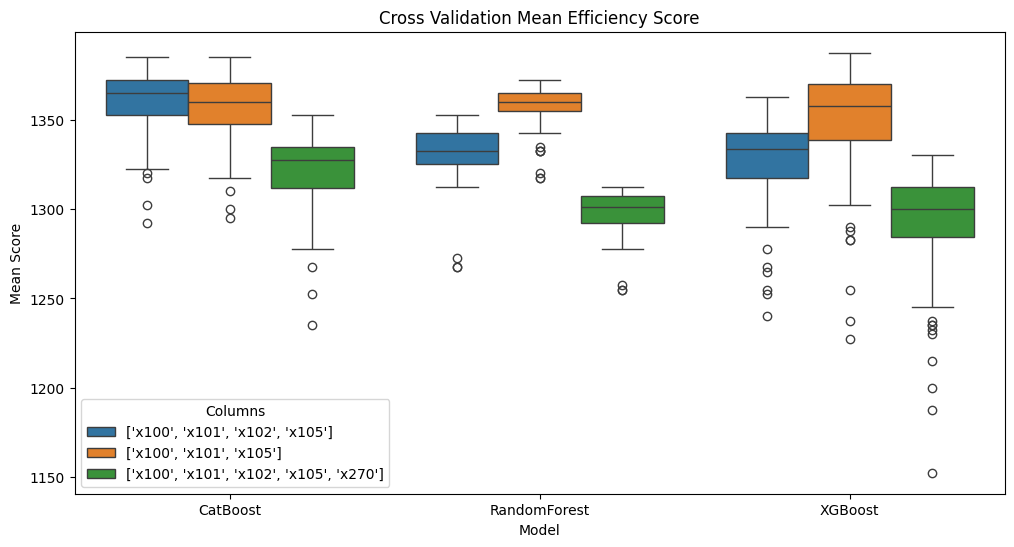

In [101]:
# Boxplot of cv_mean for each model and columns
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='cv_mean', data=df, hue='columns')
plt.title('Cross Validation Mean Efficiency Score')
plt.xlabel('Model')
plt.ylabel('Mean Score')
plt.legend(title='Columns')
plt.savefig('plots/cv_mean.png', dpi=300, bbox_inches='tight')
plt.show()

In [118]:
dc = df_cat[['test_score', 'columns']]
dc['model'] = 'CatBoost'

dr = df_rf[['es', 'columns']]
dr['model'] = 'RandomForest'
dr.rename(columns={'es': 'test_score'}, inplace=True)

dx = df_xgb[['test_score', 'columns']]
dx['model'] = 'XGBoost'

df = pd.concat([dc, dr, dx]).reset_index(drop=True)

C:\Users\szymo\AppData\Local\Temp\ipykernel_11944\3617018177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc['model'] = 'CatBoost'
C:\Users\szymo\AppData\Local\Temp\ipykernel_11944\3617018177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['model'] = 'RandomForest'
C:\Users\szymo\AppData\Local\Temp\ipykernel_11944\3617018177.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

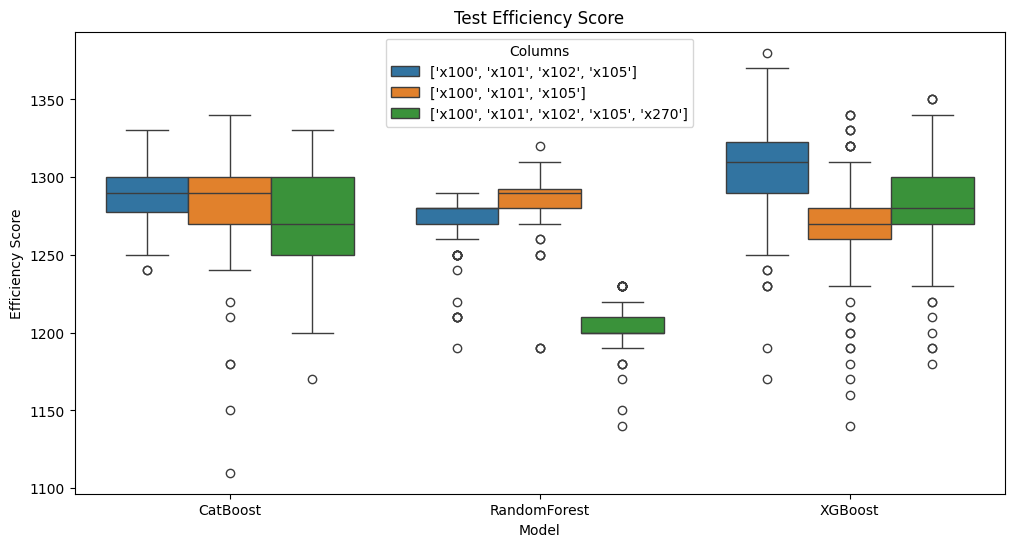

In [119]:
# Boxplot of test_score for each model and columns
plt.figure(figsize=(12, 6))
sns.boxplot(x='model', y='test_score', data=df, hue='columns')
plt.title('Test Efficiency Score')
plt.xlabel('Model')
plt.ylabel('Efficiency Score')
plt.legend(title='Columns')
plt.savefig('plots/test_score.png', dpi=300, bbox_inches='tight')
plt.show()

In [120]:
dc = df_cat[['cv_mean', 'cv_std', 'test_score', 'columns']].head(1)
dc['model'] = 'CatBoost'

dr = df_rf[['cv_mean', 'cv_std', 'es', 'columns']].head(1)
dr['model'] = 'RandomForest'
dr.rename(columns={'es': 'test_score'}, inplace=True)

dx = df_xgb[['cv_mean', 'cv_std', 'test_score', 'columns']].head(1)
dx['model'] = 'XGBoost'

df = pd.concat([dc, dr, dx]).reset_index(drop=True)

In [121]:
df

,cv_mean,cv_std,test_score,columns,model
0,1385.0,32.015621,1310.0,"['x100', 'x101', 'x102', 'x105']",CatBoost
1,1372.5,48.153401,1290.0,"['x100', 'x101', 'x105']",RandomForest
2,1387.5,50.682837,1280.0,"['x100', 'x101', 'x105']",XGBoost
